In [1]:
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from src.preprocess.functions import get_downstream_counts_object, get_upstream_counts_object

downstream_counts = get_downstream_counts_object()
upstream_counts = get_upstream_counts_object()

In [3]:
len(downstream_counts)

20160

In [4]:
from src.preprocess.functions import get_attribute_probabilities, get_seasonality, get_all_call_counts

all_seasonality = get_seasonality()
downstream_probs = get_attribute_probabilities(all_seasonality)

In [5]:
from src.preprocess.functions import sample_downstream_microservices

#sampled_microservices = sample_downstream_microservices(downstream_probs, n=10)
sampled_microservices = ['MS_3351', 'MS_9570', 'MS_23689', 'MS_18330']

In [6]:
from src.preprocess.functions import get_microservice_workload

workloads_for_sampled_microservices = [
    get_microservice_workload(downstream_counts, sampled_microservice) 
    for sampled_microservice in sampled_microservices
]

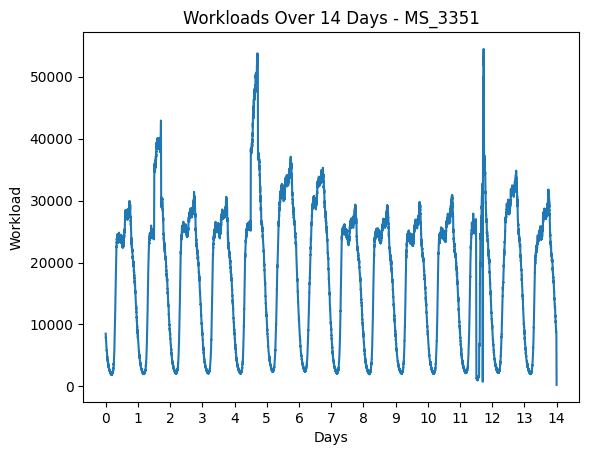

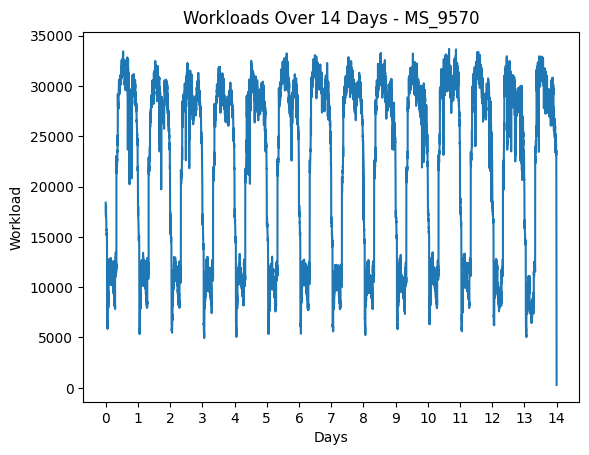

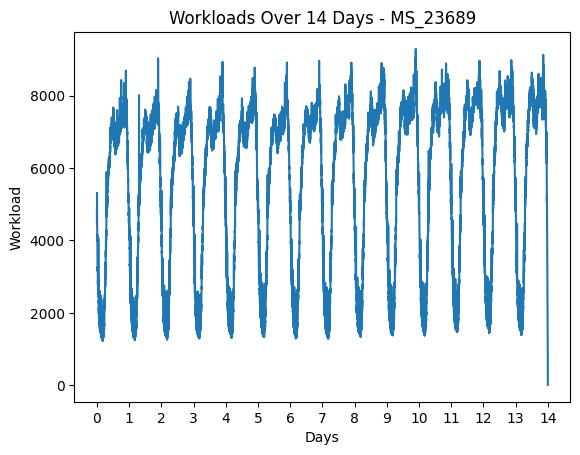

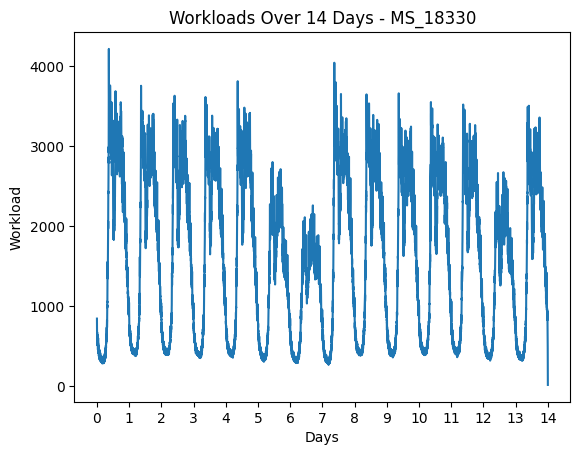

In [7]:
from src.plot import plot_microservice_workload

for i in range(len(workloads_for_sampled_microservices)):
    sampled_microservice = sampled_microservices[i]
    workloads_for_sampled_microservice = workloads_for_sampled_microservices[i]
    plot_microservice_workload(sampled_microservice, workloads_for_sampled_microservice)

In [45]:
import pickle

def get_k_neighbor_sets(node, k):
    i_node_set = set()
    u_node_set = set()
    
    def get_nested_k_neighbor_sets(graph, current_node, current_k, node_set):
        if current_k == 0:
            return
        
        node_set.add(current_node)
        
        neighbors = graph.get(current_node, {})
        for neighbor, _ in neighbors.items():
            get_nested_k_neighbor_sets(graph, neighbor, current_k - 1, node_set)
    
    with open('/Users/ashfaq/Documents/traces/data_stats_aggregated/downstream_graph.pickle', 'rb') as file:
        downstream_graph = pickle.load(file)
    
    with open('/Users/ashfaq/Documents/traces/data_stats_aggregated/upstream_graph.pickle', 'rb') as file:
        upstream_graph = pickle.load(file)
        
    get_nested_k_neighbor_sets(downstream_graph, node, k, i_node_set)
    get_nested_k_neighbor_sets(upstream_graph, node, k, u_node_set)
    return i_node_set, u_node_set

In [46]:
from src.preprocess.functions import get_node_label_encoder

label_encoder = get_node_label_encoder()
labels = label_encoder.transform(['MS_3351', 'MS_9570', 'MS_23689', 'MS_18330'])

In [252]:
labels

array([23998, 66470, 14085,  8672])

In [280]:
i_set_1, u_set_1 = get_k_neighbor_sets(23998, 3)

In [281]:
len(i_set_1), len(u_set_1), len(i_set_1 | u_set_1)

(78, 2, 78)

In [255]:
i_set_2, u_set_2 = get_k_neighbor_sets(66470, 3)

In [256]:
len(i_set_2), len(u_set_2), len(i_set_2 | u_set_2)

(428, 2, 428)

In [257]:
i_set_3, u_set_3 = get_k_neighbor_sets(14085, 3)

In [258]:
len(i_set_3), len(u_set_3), len(i_set_3 | u_set_3)

(4, 4, 4)

In [50]:
i_set_4, u_set_4 = get_k_neighbor_sets(8672, 3)
len(i_set_4), len(u_set_4), len(i_set_4 | u_set_4)

(566, 320, 774)

In [260]:
total_set = i_set_1 | u_set_1 | i_set_2 | u_set_2 | i_set_3 | u_set_3 | i_set_4 | u_set_4

In [261]:
len(total_set)

1271

In [5]:
import pandas as pd

pd.read_parquet('/Users/ashfaq/Documents/traces/filtered_data_files_1/data_750.parquet')

,u,i,ts,idx,rt,0,1,2,3,4
2647433263,75,25,45000002,2647433264,10.0,0.0,0.0,0.0,0.0,1.0
2647433345,76,25,45000003,2647433346,83.0,0.0,1.0,0.0,0.0,0.0
2647433349,75,25,45000003,2647433350,20.0,0.0,0.0,0.0,0.0,1.0
2647433394,75,25,45000004,2647433395,20.0,0.0,0.0,0.0,0.0,1.0
2647433501,76,35,45000006,2647433502,5.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2651871984,75,67,45059995,2651871985,3.0,0.0,0.0,0.0,0.0,1.0
2651872112,76,35,45059997,2651872113,5.0,0.0,0.0,0.0,0.0,1.0
2651872169,75,67,45059998,2651872170,2.0,0.0,0.0,0.0,0.0,1.0
2651872275,75,25,45059999,2651872276,33.0,0.0,0.0,0.0,0.0,1.0


In [8]:
from src.preprocess.functions import get_total_interactions

get_total_interactions('/Users/ashfaq/Documents/traces/data_stats_aggregated_2/filtered_counts.pickle')

3115070694